MinMax

Parameters:
player: The identifier for the player (either "1" or "2").
depth: The maximum depth of the search tree to explore.
maximizing: A boolean indicating if the current recursion level is trying to maximize or minimize the evaluation score.
Purpose: To find the optimal move for the current player considering future possible moves by both players up to a specified depth.
Returns: A tuple containing the best evaluation score from the current state and the best move to achieve that score.
Step-by-Step Explanation
Base Case
If depth is 0, the function returns the current board evaluation (by calling evaluate_board()) and None for the move. This indicates that the recursion has reached its maximum depth, and it's time to assess the board state from the perspective of the maximizing player without further moves.
Recursive Case
The function operates differently based on the maximizing flag:

1. Maximizing Player
Initialize max_eval to negative infinity to ensure any actual score evaluated is higher. This is because the maximizing player seeks to maximize the score.
Iterate over all valid moves for the player using get_valid_moves(player).
For each move:
Execute the move by calling evaluate_click(*move).
Recursively call minimax with depth-1 and maximizing set to False, indicating it's now the minimizing player's turn.
After the recursive call, undo the move with undo_move(*move) to restore the board to its previous state.
Compare the evaluation score returned by the recursive call to max_eval. If it's greater, update max_eval and record this move as best_move.
Return max_eval and best_move, representing the best possible outcome from this point for the maximizing player and the move to achieve it.
2. Minimizing Player
Initialize min_eval to positive infinity, as the minimizing player seeks to minimize the score.
Similar to the maximizing player, iterate over all valid moves:
Perform each move and call minimax recursively with depth-1 and maximizing set to True, switching back to maximizing player's perspective.
Undo each move to not affect the ongoing game state.
If the recursive call returns a score less than min_eval, update min_eval and best_move to reflect the most disadvantageous outcome for the opponent (advantageous for the minimizing player).
Return min_eval and best_move.

BFS

Overview
Purpose: To identify the best move for the specified player using a breadth-first search approach.
Parameters:
player: The player number ("1" or "2"), indicating whose move it is.
Returns: A boolean indicating whether a move was made (True) or if no valid move was found (False).
Function Execution
Initialization
Queue Initialization: The function starts by initializing a queue using deque with a tuple containing the current board state and an empty path list. The path will store the sequence of moves leading to each board state.
Seen States: A set called seen_states is created to keep track of the board configurations that have already been explored. This prevents the algorithm from revisiting the same board state multiple times and ensures efficiency.
BFS Loop
Queue Processing: The function enters a loop that continues until the queue is empty. This loop processes each board configuration in a breadth-first manner.
Dequeue Operation: The first element (board and path) is popped from the queue.
Path Check: If the path length is greater than 1, the current board is skipped. This is a constraint to limit the search depth to one move ahead only, simplifying the BFS to focus only on immediate possible moves.
Move Exploration
Valid Moves: For the current board state, all valid moves for the player are determined using get_valid_moves(player).
Move Execution:
For each move, a copy of the current board (new_board) is created to simulate the move without altering the actual game board.
The move is executed on this new board using evaluate_click(*move).
State Tracking:
After a move is executed, the resulting board configuration is converted into a tuple (board_tuple), which is a hashable format suitable for tracking in a set.
If this board state has not been seen before, it is added to seen_states.
The new board state, along with the path updated to include the current move, is enqueued for further exploration.
Best Move Selection
Best Move Execution: If a valid move is found (i.e., best_move is not None), the function executes this move on the actual game board using evaluate_click(*best_move).
Return Value: The function returns True if a move was executed, indicating a successful action. If the queue is exhausted without finding a valid move, it returns False.

Greedy


Purpose: Finds and executes the move that offers the most immediate advantage in terms of piece count differential for the given player.
Parameters:
player: A string ("1" or "2") representing which player's turn it is.
Returns: A boolean indicating whether a move was made (True) or if no advantageous move was found (False).
Detailed Step-by-Step Logic
Initialization
Best Move Tracking: Initialize best_move to None. This variable will store the move that provides the highest immediate gain in terms of piece count differential.
Maximum Difference Initialization: Initialize max_piece_diff to negative infinity (float('-inf')). This variable keeps track of the highest piece differential found among all evaluated moves.
Move Evaluation Loop
Valid Moves Enumeration: Iterate through all valid moves available to the player using the get_valid_moves(player) function.
Move Execution: For each move (from_x, from_y, to_x, to_y), temporarily execute the move on the board by calling evaluate_click(from_x, from_y, to_x, to_y).
Board Evaluation
Evaluate Board: After executing the move, evaluate the current board state by calling evaluate_board(), which calculates the difference in the number of pieces between the two players.
Undo Move: Immediately undo the move using undo_move(from_x, from_y, to_x, to_y) to restore the board to its original state before the move was made.
Greedy Selection
Update Best Move: If the piece differential obtained from evaluate_board() is greater than the current max_piece_diff, update max_piece_diff with the new differential and best_move with the current move. This ensures that the function always selects the move that maximizes the immediate gain.
Execute Best Move
Perform Best Move: After evaluating all possible moves, check if a best_move has been found. If so, execute this move permanently on the board by calling evaluate_click(*best_move).
Return Result: Return True to indicate that a move was made. If no move was found that improves the situation (i.e., no move resulted in a higher piece count differential than negative infinity), return False.

evaluate_click(self, from_x, from_y, to_x, to_y)


Purpose
Simulates the action of moving a piece on the board as if the player clicked to move a piece from one location to another. This function is crucial for both actual game moves and simulating moves in strategies like Minimax.

Logic
Define Move: Constructs a move tuple from the provided coordinates.
Check Validity: Uses get_valid_moves to check if the constructed move is within the list of valid moves for the piece at the starting coordinates.
Execute Move: If the move is valid, the piece at the starting position (from_x, from_y) is moved to the destination (to_x, to_y), and the original position is vacated.
Return Result: Returns True if the move was valid and executed, otherwise returns False.
undo_move(self, from_x, from_y, to_x, to_y)
Purpose
Reverses a previously made move. This is particularly useful during AI calculations, like in the Minimax algorithm, where moves are simulated and then undone during the recursive evaluation of game states.

undo_move

Logic
Restore Original Piece: Moves the piece back from the destination (to_x, to_y) to its original location (from_x, from_y).
Clear Destination: The destination cell is cleared (set to None), effectively undoing the move.
evaluate_board(self)
Purpose
Calculates a simple numerical score representing the state of the board from the perspective of player 2 minus player 1. This function is used to evaluate board configurations during game strategies and AI decision-making processes.

evaluate_board

Logic
Count Player Pieces: Iterates through the board and counts the number of pieces for player 1 ('1') and player 2 ('2').
Calculate Differential: Computes the difference in the number of pieces between player 2 and player 1. A positive score indicates a lead for player 2, while a negative score indicates a lead for player 1.
Return Score: Returns the calculated differential.

check_game_status

Retrieve Valid Moves:
player1_moves: The function calls get_valid_moves("1") to fetch all possible legal moves for Player 1. This list includes all the moves that Player 1 can legally make according to the rules of the game.
player2_moves: Similarly, it calls get_valid_moves("2") for Player 2 to fetch all possible moves for Player 2.
Evaluate Moves:
The function first checks if player1_moves is empty, which means Player 1 has no legal moves available:
If player2_moves is also empty, it implies that neither player can make a move. This typically happens when the board reaches a stalemate condition. The game status is set to 'Draw', and it prints "Game is a draw!" to notify the players.
If player2_moves is not empty, meaning Player 2 can still make moves, Player 2 is declared the winner by default since Player 1 cannot respond. The game status is updated to 'Player 2 wins', and it prints "Player 2 wins!".
If player1_moves is not empty but player2_moves is empty, it indicates that Player 2 has no available legal moves while Player 1 does:
In this case, Player 1 is declared the winner. The game status is updated to 'Player 1 wins', and it prints "Player 1 wins!".
If both players have moves left, the function doesn't change the game status, allowing the game to continue.

run_game

Purpose
To conduct a complete game session from start to finish, managing player turns, game state updates, and termination conditions.

Process
Initialize Game:
start_time: Captures the current time at the start of the game for duration calculation purposes.
self.reset_game(): Resets the board and other necessary game state variables to their initial settings, preparing for a new game.
Game Loop:
The function enters a loop that continues as long as self.status is set to 'playing', indicating that the game is ongoing and hasn't reached a conclusion.
Inside the loop, the function manages turns based on self.turn:
Player 1's Turn (self.turn % 2 == 0):
move = self.get_random_move("1"): Attempts to fetch a random valid move for Player 1.
if move: If a valid move is found, it is executed using self.evaluate_click(*move), which updates the board accordingly.
Player 2's Turn (else clause):
if not self.ai_move(): Tries to make a move using the AI strategy specified for Player 2. If self.ai_move() returns False (indicating no move was made),
if not self.get_valid_moves("2"): Checks if there are no valid moves left for Player 2. If true, it means Player 2 is stuck without any legal moves, and Player 1 is declared the winner by updating self.status to "Player 1 wins".
Check Game Status:
self.check_game_status(): This is called after each turn to evaluate whether the game should continue. This function checks if either player has run out of moves, which would lead to a win for the other player or a draw.
Turn Management:
self.turn += 1: Increments the turn counter, facilitating the alternation of turns between Player 1 and Player 2.
Calculate Duration and Conclude Game:
Once the loop exits (when self.status is no longer 'playing'), duration = time.time() - start_time calculates the total time elapsed during the game.
return self.status, duration: Returns the final status of the game (who won or if it was a draw) and the duration of the game session.



In [ ]:
# Importing necessary libraries
import random
import time
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
import tracemalloc

# Define the CheckersGame class to manage the game logic
class CheckersGame:
    def __init__(self, opponent_type="minimax"):
        self.opponent_type = opponent_type  # Define the AI opponent type
        self.reset_game()  # Initialize the game by setting up the board

    def reset_game(self):
        # Initialize the board with pieces in starting positions for players '1' and '2'
        self.board = [
            [None, "1", None, "1", None, "1", None, "1"],
            ["1", None, "1", None, "1", None, "1", None],
            [None, "1", None, "1", None, "1", None, "1"],
            [None, None, None, None, None, None, None, None],
            [None, None, None, None, None, None, None, None],
            ["2", None, "2", None, "2", None, "2", None],
            [None, "2", None, "2", None, "2", None, "2"],
            ["2", None, "2", None, "2", None, "2", None],
        ]
        self.turn = 0  # Counter for tracking the number of moves played
        self.players = ["Random Player", "AI Player"]  # List of players
        self.status = 'playing'  # Current status of the game, initially set to 'playing'

    def print_board(self):
        # Display the current state of the board in the console
        for row in self.board:
            print(' '.join(['.' if x is None else x for x in row]))
        print()

    def get_valid_moves(self, player):
        # Determine valid moves for the specified player
        moves = []
        direction = 1 if player == "1" else -1  # Direction pieces move based on player
        for x in range(8):
            for y in range(8):
                if self.board[x][y] == player:
                    # Check for empty spaces diagonally forward for possible moves
                    if 0 <= x + direction < 8:
                        if y - 1 >= 0 and self.board[x + direction][y - 1] is None:
                            moves.append((x, y, x + direction, y - 1))
                        if y + 1 < 8 and self.board[x + direction][y + 1] is None:
                            moves.append((x, y, x + direction, y + 1))
        return moves  # Return a list of all valid moves

    def evaluate_click(self, from_x, from_y, to_x, to_y):
        # Simulate the effect of a player clicking a move
        move = (from_x, from_y, to_x, to_y)
        if move in self.get_valid_moves(self.board[from_x][from_y]):
            self.board[to_x][to_y] = self.board[from_x][from_y]  # Move piece to new location
            self.board[from_x][from_y] = None  # Vacate the original location
            return True
        return False

    def undo_move(self, from_x, from_y, to_x, to_y):
        # Reverse a move (used in simulations like minimax)
        self.board[from_x][from_y] = self.board[to_x][to_y]  # Move piece back to original location
        self.board[to_x][to_y] = None  # Clear the destination spot

    def evaluate_board(self):
        # Evaluate the current board for scoring
        player1_count = sum(row.count('1') for row in self.board)  # Count pieces for player 1
        player2_count = sum(row.count('2') for row in self.board)  # Count pieces for player 2
        return player2_count - player1_count  # Return the differential (useful for AI evaluation)

    def greedy_move(self, player):
        # Implement a greedy algorithm to find the best immediate move
        best_move = None
        max_piece_diff = float('-inf')
        for move in self.get_valid_moves(player):
            from_x, from_y, to_x, to_y = move
            self.evaluate_click(from_x, from_y, to_x, to_y)  # Perform the move
            piece_diff = self.evaluate_board()  # Evaluate board after the move
            self.undo_move(from_x, from_y, to_x, to_y)  # Undo the move
            if piece_diff > max_piece_diff:
                max_piece_diff = piece_diff  # Update best score found
                best_move = move  # Update best move found
        if best_move:
            self.evaluate_click(*best_move)  # Execute the best move
            return True
        return False

    def ai_move(self):
        # Decide and execute an AI move based on the chosen strategy
        if self.opponent_type == "minimax":
            _, move = self.minimax("2", 3, True)  # Use minimax algorithm
            if move:
                self.evaluate_click(*move)  # Perform the move
                return True
        elif self.opponent_type == "bfs":
            return self.bfs_move("2")  # Use breadth-first search algorithm
        elif self.opponent_type == "greedy":
            return self.greedy_move("2")  # Use a greedy approach
        return False

    def minimax(self, player, depth, maximizing):
        # Minimax algorithm for AI decision-making
        if depth == 0:
            return self.evaluate_board(), None  # Return current board evaluation at max depth
        best_move = None
        if maximizing:
            max_eval = float('-inf')
            for move in self.get_valid_moves(player):
                self.evaluate_click(*move)  # Perform the move
                eval_score, _ = self.minimax(player, depth-1, False)  # Recursive call for opponent's move
                self.undo_move(*move)  # Undo the move
                if eval_score > max_eval:
                    max_eval = eval_score  # Update the best evaluation
                    best_move = move  # Update the best move
            return max_eval, best_move
        else:
            min_eval = float('inf')
            for move in self.get_valid_moves(player):
                self.evaluate_click(*move)  # Perform the move
                eval_score, _ = self.minimax(player, depth-1, True)  # Recursive call for your own next move
                self.undo_move(*move)  # Undo the move
                if eval_score < min_eval:
                    min_eval = eval_score  # Update worst evaluation
                    best_move = move  # Update worst move
            return min_eval, best_move

    def bfs_move(self, player):
        # Breadth-first search algorithm to find the best move
        queue = deque([(self.board, [])])  # Initialize the queue with the current board
        seen_states = set()  # Set to track seen board states
        best_move = None

        while queue:
            current_board, path = queue.popleft()  # Get the first board in the queue
            if len(path) > 1:
                continue  # Skip if path length is greater than 1

            moves = self.get_valid_moves(player)  # Get valid moves for the player
            for move in moves:
                new_board = [row[:] for row in current_board]  # Copy the board
                self.evaluate_click(*move)  # Perform the move
                board_tuple = tuple(map(tuple, new_board))  # Convert board to a tuple for hashing
                if board_tuple not in seen_states:
                    seen_states.add(board_tuple)  # Add new state to seen states
                    queue.append((new_board, path + [move]))  # Add new state to the queue
                    best_move = move  # Update the best move

            if best_move:
                self.evaluate_click(*best_move)  # Perform the best move
                return True
        return False

    def check_game_status(self):
        # Check the status of the game to update the game outcome
        player1_moves = self.get_valid_moves("1")  # Get valid moves for player 1
        player2_moves = self.get_valid_moves("2")  # Get valid moves for player 2
        if not player1_moves:
            if player2_moves:
                self.status = 'Player 2 wins'  # Set status to Player 2 wins
                print("Player 2 wins!")
            else:
                self.status = 'Draw'  # Set status to draw if no moves for both
                print("Game is a draw!")
        elif not player2_moves:
            if player1_moves:
                self.status = 'Player 1 wins'  # Set status to Player 1 wins
                print("Player 1 wins!")
            else:
                self.status = 'Draw'  # Set status to draw if no moves for both
                print("Game is a draw!")

    def run_game(self):
        # Main method to start and manage the game flow
        start_time = time.time()  # Record the start time of the game
        self.reset_game()  # Reset the game to start
        while self.status == 'playing':
            if self.turn % 2 == 0:
                move = self.get_random_move("1")  # Player 1 moves randomly
                if move:
                    self.evaluate_click(*move)  # Execute the move
            else:
                if not self.ai_move():
                    if not self.get_valid_moves("2"):
                        self.status = "Player 1 wins"  # Player 1 wins if no moves left for Player 2
                        print("Player 1 wins by no move left for Player 2!")
            self.check_game_status()  # Check game status to possibly end the game
            self.turn += 1  # Increment turn count
        duration = time.time() - start_time  # Calculate game duration
        return self.status, duration  # Return the result of the game and its duration

    def get_random_move(self, player):
        # Randomly select a valid move for the player
        valid_moves = self.get_valid_moves(player)  # Get all valid moves
        if valid_moves:
            return random.choice(valid_moves)  # Return a random move
        return None

# Define a function to run multiple games


# Define a function to run multiple batches of games
def run_multiple_batches(num_batches, games_per_batch, opponent_type):
    all_batch_results = []
    for batch in range(num_batches):
        results = []
        for _ in range(games_per_batch):
            game = CheckersGame(opponent_type=opponent_type)  # Create a new game instance
            result, duration = game.run_game()  # Run the game
            results.append((result, duration))  # Append the result and duration

        batch_df = pd.DataFrame(results, columns=['Winner', 'Duration'])  # Create DataFrame for the batch
        all_batch_results.append(batch_df)  # Append the DataFrame to the batch results
    return all_batch_results  # Return all batch results


# Define a function to run multiple batches of games
def run_multiple_batches(num_batches, games_per_batch, opponent_type):
    all_batch_results = []
    for batch in range(num_batches):
        results = []
        for _ in range(games_per_batch):
            game = CheckersGame(opponent_type=opponent_type)  # Create a new game instance
            result, duration = game.run_game()  # Run the game
            results.append((result, duration))  # Append the result and duration

        batch_df = pd.DataFrame(results, columns=['Winner', 'Duration'])  # Create DataFrame for the batch
        all_batch_results.append(batch_df)  # Append the DataFrame to the batch results
    return all_batch_results  # Return all batch results

Streaming output truncated to the last 5000 lines.
Player 2 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 2 wins!
Player 1 wins!
Player 2 wins!
Player 1 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Game is a draw!
Game is a draw!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 1 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Game is a draw!
Player 2 wins!
Player 1 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 1 wins!
Player 1 wins!
Player 2 wins!
Player 2 wins!
Game is a draw!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Game is a draw!
Player 2 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 2 wins!
Player 2 wins!
Player 2 wins!
Player 1 wins!
Player 1 wins!
Player 2 wins!
Player 2 wins!
Player 1 wins!
Player 2 wins!
Player 1 wins!
Game is a draw

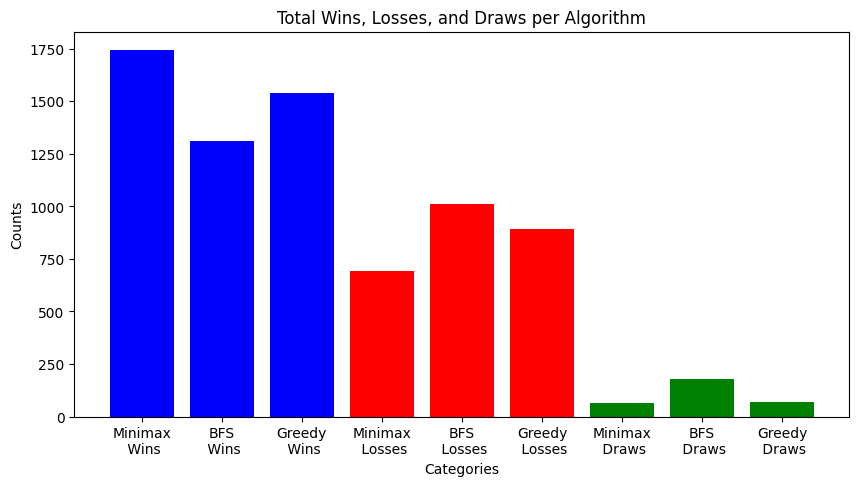

  Strategy  Peak Memory Usage (bytes)
0  Minimax                     631821
1      BFS                     515867
2   Greedy                     323535


In [ ]:
# Define a function to analyze game results from a DataFrame
def analyze_game_results(df):
    # Extract relevant metrics
    return {
        'Duration': df['Duration'],  # Just return the series
        'Win Counts': df['Winner'].value_counts()  # Count wins
    }

# Function to aggregate results from all batches into one DataFrame
def aggregate_results(batches, opponent_type):
    all_durations = []
    all_win_counts = pd.Series(dtype=int)

    for batch_df in batches:
        results = analyze_game_results(batch_df)
        all_durations.extend(results['Duration'])  # Collect all durations
        all_win_counts = all_win_counts.add(results['Win Counts'], fill_value=0)  # Sum win counts

    # Calculate the longest, shortest, and average durations
    longest_game = max(all_durations)
    shortest_game = min(all_durations)
    average_game_duration = sum(all_durations) / len(all_durations)

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Algorithm Type': [opponent_type],
        'Total Wins': [all_win_counts.get('Player 2 wins', 0)],
        'Total Losses': [all_win_counts.get('Player 1 wins', 0)],
        'Total Draws': [all_win_counts.get('Draw', 0)],
        'Longest Game Duration': [longest_game],
        'Shortest Game Duration': [shortest_game],
        'Average Game Duration': [average_game_duration]
    })

    return summary_df



# Function to plot the consolidated results
def plot_results(df):
    plt.figure(figsize=(10, 5))
    plt.bar(df['Algorithm Type'] + '\n Wins', df['Total Wins'], color='blue')
    plt.bar(df['Algorithm Type'] + '\n Losses', df['Total Losses'], color='red')
    plt.bar(df['Algorithm Type'] + '\n Draws', df['Total Draws'], color='green')
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title('Total Wins, Losses, and Draws per Algorithm')
    plt.show()

# Run batches for different AI strategies
num_batches = 50
games_per_batch = 50

# Gather results
# Function to run and track the memory usage of different batch types
def run_and_track_memory(strategy):
    tracemalloc.start()  # Start memory tracking
    batches = run_multiple_batches(num_batches, games_per_batch, strategy)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()  # Stop memory tracking
    return batches, peak

# Tracking memory for each strategy
minimax_batches, minimax_memory = run_and_track_memory("minimax")
bfs_batches, bfs_memory = run_and_track_memory("bfs")
greedy_batches, greedy_memory = run_and_track_memory("greedy")


# Aggregate results and display
minimax_results = aggregate_results(minimax_batches, 'Minimax')
bfs_results = aggregate_results(bfs_batches, 'BFS')
greedy_results = aggregate_results(greedy_batches, 'Greedy')

# Print summary tables
print(minimax_results)
print(bfs_results)
print(greedy_results)

# Plotting the results
plot_results(pd.concat([minimax_results, bfs_results, greedy_results], ignore_index=True))
# Creating a DataFrame to display the results
data = {
    "Strategy": ["Minimax", "BFS", "Greedy"],
    "Peak Memory Usage (bytes)": [minimax_memory, bfs_memory, greedy_memory]
}
df = pd.DataFrame(data)
print(df)